################################
Working Base : C:/VKHCG  using  win32
################################
################################
Loading : C:/VKHCG/02-Krennwallner/02-Assess/01-EDS/02-Python/Assess-DE-Billboard-Visitor.csv
################################
################################
  BillboardCountry BillboardPlaceName  BillboardLatitude  BillboardLongitude  \
0               DE               Lake            51.7833              8.5667   
1               DE               Horb            48.4333              8.6833   
2               DE               Horb            48.4333              8.6833   
3               DE               Horb            48.4333              8.6833   
4               DE               Horb            48.4333              8.6833   

  VisitorCountry VisitorPlaceName  VisitorLatitude  VisitorLongitude  \
0             DE             Lake          51.7833            8.5667   
1             DE             Horb          48.4333            8.6833   
2     

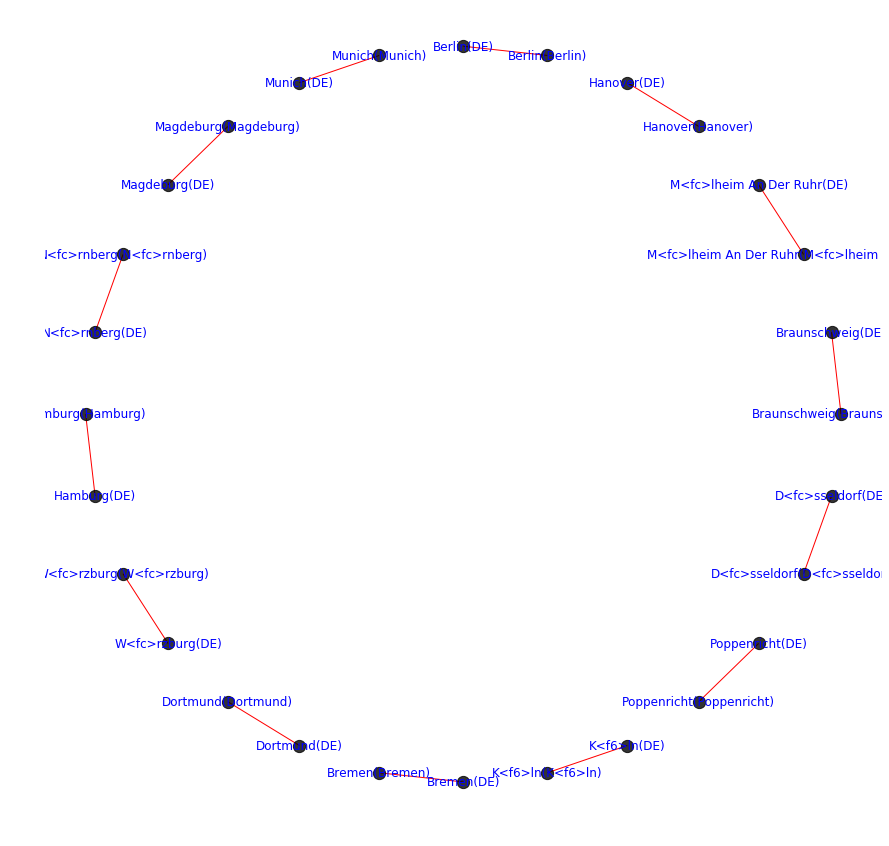

################################
### Done!! #####################
################################
Gayatri kulkarni - 53004230002


In [4]:
import sys
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
################################################################
pd.options.mode.chained_assignment = None
################################################################
if sys.platform == 'linux' or sys.platform == ' darwin':
    Base=os.path.expanduser('~') + 'VKHCG'
else:
    Base='C:/VKHCG'
################################################################
print('################################')
print('Working Base :',Base, ' using ', sys.platform)
print('################################')
################################################################
sInputFileName='02-Assess/01-EDS/02-Python/Assess-DE-Billboard-Visitor.csv'
################################################################
sOutputFileName1='05-Organise/01-EDS/02-Python/Organise-Billboards.gml'
sOutputFileName2='05-Organise/01-EDS/02-Python/Organise-Billboards.png'
Billboard='02-Krennwallner'
################################################################
################################################################
### Import Proximity Sensor Data
################################################################
sFileName=Base + '/' + Billboard + '/' + sInputFileName
print('################################')
print('Loading :',sFileName)
print('################################')
BillboardDataRaw=pd.read_csv(sFileName,header=0,low_memory=False,encoding="latin-1")
print('################################')
################################################################
print(BillboardDataRaw.head())
print(BillboardDataRaw.shape)
BillboardData=BillboardDataRaw
sSample=list(np.random.choice(BillboardData.shape[0],20))
G=nx.Graph()
for i in sSample:
    for j in sSample:
        Node0=BillboardData['BillboardPlaceName'][i] + '('+ BillboardData['BillboardCountry'][i] + ')'
        Node1=BillboardData['BillboardPlaceName'][j] + '('+ BillboardData['BillboardCountry'][i] + ')'
if Node0 != Node1:
    G.add_edge(Node0,Node1)
for i in sSample:
    Node0=BillboardData['BillboardPlaceName'][i] + '('+ BillboardData['VisitorPlaceName'][i] + ')'
    Node1=BillboardData['BillboardPlaceName'][i] + '('+ BillboardData['VisitorCountry'][i] + ')'
    if Node0 != Node1:
        G.add_edge(Node0,Node1)
print('Nodes:', G.number_of_nodes())
print('Edges:', G.number_of_edges())
################################################################
sFileName=Base + '/' + Billboard + '/' + sOutputFileName1
print('################################')
print('Storing :',sFileName)
print('################################')
nx.write_gml(G, sFileName)
################################################################
sFileName=Base + '/' + Billboard + '/' + sOutputFileName2
print('################################')
print('Storing Graph Image:',sFileName)
print('################################')
plt.figure(figsize=(15, 15))
pos=nx.circular_layout(G,dim=2)
nx.draw_networkx_nodes(G,pos, node_color='k', node_size=150, alpha=0.8)
nx.draw_networkx_edges(G, pos,edge_color='r', arrows=False, style='solid')
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif',font_color='b')
plt.axis('off')
plt.savefig(sFileName,dpi=600)
plt.show()
################################################################
print('################################')
print('### Done!! #####################')
print('################################')
################################################################

print('Gayatri kulkarni - 53004230002')